<IPython.core.display.Javascript object>


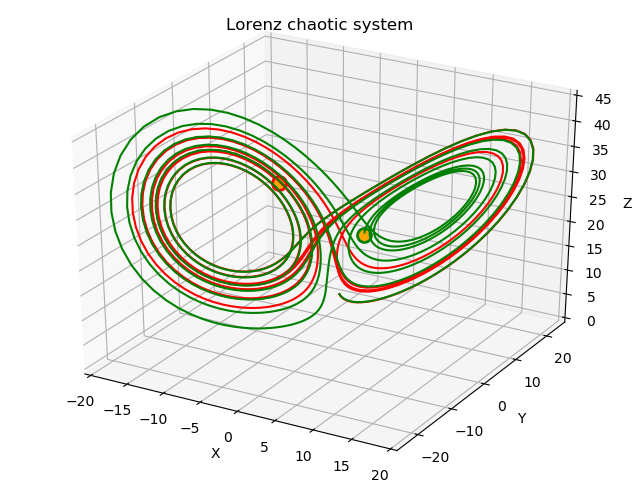

In [2]:
 %matplotlib notebook
# %matplotlib qt
from scipy.integrate import odeint 
import numpy as np 
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.display import HTML

#仿真数据
def lorenz(w, t, p, r, b): 
    x, y, z = w #初值
    return np.array([p*(y-x), x*(r-z)-y, x*y-b*z]) 


t = np.arange(0, 10.0, 0.01) # 创建时间点 
# 调用ode对lorenz进行求解, 用两个不同但很接近的初始值 
track1 = odeint(lorenz, (1.0, 1.00, 10.0), t, args=(10.0, 28.0, 3.0)) 
track2 = odeint(lorenz, (1.0, 1.00, 10.1), t, args=(10.0, 28.0, 3.0)) 
#转置以配合后面set_data函数的要求
track1 = track1.T
track2 = track2.T


#绘图
fig = plt.figure()
ax = p3.Axes3D(fig)

# Setting the axes properties,坐标范围要够大
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d([-20.0, 20.0])
ax.set_ylim3d([-25.0, 25.0])
ax.set_zlim3d([0.0, 45.0])
ax.set_title('Lorenz chaotic system')

# 设置小球和线形
ball1, = ax.plot([],[],linestyle='None',marker='o',\
                 markersize=10,markeredgecolor='r',\
                 color='orange',markeredgewidth=2)
ball2, = ax.plot([],[],linestyle='None',marker='o',\
                 markersize=10,markeredgecolor='green',\
                 color='orange',markeredgewidth=2)
line1, = ax.plot([],[],color='r')
line2, = ax.plot([],[],color='green')

def init():
    #注意set_data只能对二维数据进行，所以是0：2
    #set_3d_properties(track1[2,0])对第3维进行set_data
    ball1.set_data(track1[0:2, 0])
    ball1.set_3d_properties(track1[2,0])
    ball2.set_data(track2[0:2, 0])
    ball2.set_3d_properties(track2[2,0])
    line1.set_data(track1[0:2, 0])
    line1.set_3d_properties(track1[2,0])
    line2.set_data(track2[0:2, 0])
    line2.set_3d_properties(track2[2,0])
    return ball1,ball2,line1,line2

def animate(i):
    ball1.set_data(track1[0:2, i])
    ball1.set_3d_properties(track1[2,i])
    ball2.set_data(track2[0:2, i])
    ball2.set_3d_properties(track2[2,i])
    line1.set_data(track1[0:2, :i])
    line1.set_3d_properties(track1[2,:i])
    line2.set_data(track2[0:2, :i])
    line2.set_3d_properties(track2[2,:i])
    return ball1,ball2,line1,line2

line_ani = animation.FuncAnimation(fig, animate, np.arange(1,t.size), init_func=init,
                                  interval=30, repeat=False, blit=False)
plt.show()